<a href="https://colab.research.google.com/github/venkateshnaramula/SRU_CSE/blob/main/SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to C:\Users\divya
[nltk_data]     dathu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
df=pd.read_csv('samsung galaxy.csv',encoding='latin1')

In [ ]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 09:00,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",NaveenN12532877,122,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
1,Here are M1's mobile plan offerings together w...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://www.echobox.com\"" rel=\""nofol...",hardwarezone,0,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
2,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",krishnakaran_BK,122,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
3,RT @SamsungMobile: Sound made for your ears. I...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",YoIngenio,1957,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN
4,#BestSeller #phonentablet Tentoper Smart Clear...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobileoutfits.com/\"" rel=\""no...",Mobile_Outfits,0,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.describe()

,id,latitude,Unnamed: 18,Unnamed: 19
count,1.495000e+03,1.0,0.0,0.0
mean,1.290000e+18,0.0,NaN,NaN
std,4.532716e+04,NaN,NaN,NaN
min,1.290000e+18,0.0,NaN,NaN
25%,1.290000e+18,0.0,NaN,NaN
50%,1.290000e+18,0.0,NaN,NaN
75%,1.290000e+18,0.0,NaN,NaN
max,1.290000e+18,0.0,NaN,NaN


In [ ]:
df.isnull()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
1,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
2,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
3,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
5,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
6,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
7,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
8,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True
9,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,True,True,True,True,True


In [ ]:
text=df.text

In [ ]:
text

0       RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
1       Here are M1's mobile plan offerings together w...
2       RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
3       RT @SamsungMobile: Sound made for your ears. I...
4       #BestSeller #phonentablet Tentoper Smart Clear...
5       RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
6       RT @Tech_Masala_: #Samsung @SamsungMobile @Sam...
7       RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
8       RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
9       RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
10      RT @SamsungMobile: All the fun, now on the go:...
11      RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
12      RT @SamsungMobile: Sound made for your ears. I...
13      RT @Samsung: The #GalaxyNote20 and #GalaxyNote...
14      RT @Digital360X: Samsung Galaxy S10 Series (8G...
15      RT @TamilTechOffici: Samsung Galaxy M31s vs Re...
16      Watch Samsung?s official Galaxy Note 20 Ultra ...
17      RT @Sa

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

In [ ]:
df["text"] = df["text"].astype(str)

In [ ]:
df["textclean"] = df["text"].apply(lambda text: remove_urls(text))

In [ ]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,...,retweetCount,isRetweet,retweeted,longitude,latitude,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,textclean
0,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 09:00,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,122,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...
1,Here are M1's mobile plan offerings together w...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://www.echobox.com\"" rel=\""nofol...",...,0,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,Here are M1's mobile plan offerings together w...
2,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,122,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...
3,RT @SamsungMobile: Sound made for your ears. I...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,1957,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Sound made for your ears. Introducing #Gal...
4,#BestSeller #phonentablet Tentoper Smart Clear...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobileoutfits.com/\"" rel=\""no...",...,0,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,#BestSeller #phonentablet Tentoper Smart Clear...


In [ ]:
top_N = 100 #top 100 words

#convert list of list into text
a = df['textclean'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [ ]:
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
#from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))
nltk_words = list(stopwords.words('english'))
stop_words.extend(nltk_words)

In [ ]:
from wordcloud import WordCloud, STOPWORDS
nltk.download('punkt')
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package punkt to C:\Users\divya
[nltk_data]     dathu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Remove characters which have length less than 2
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

In [ ]:

from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]


word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

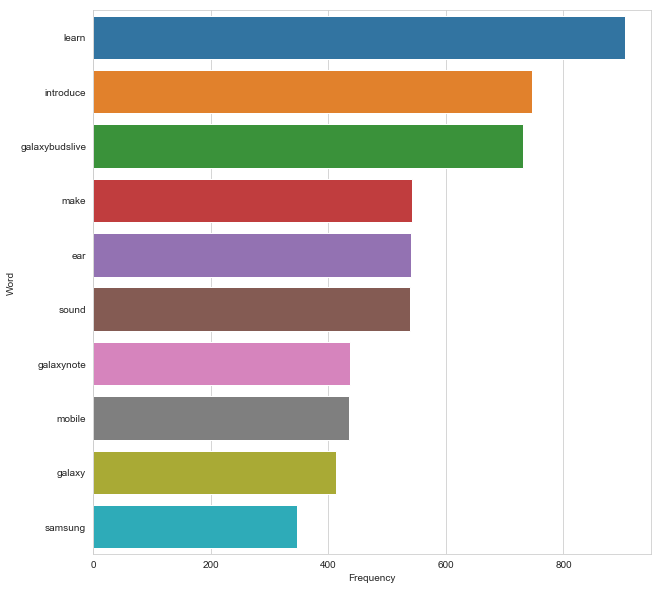

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))


In [ ]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

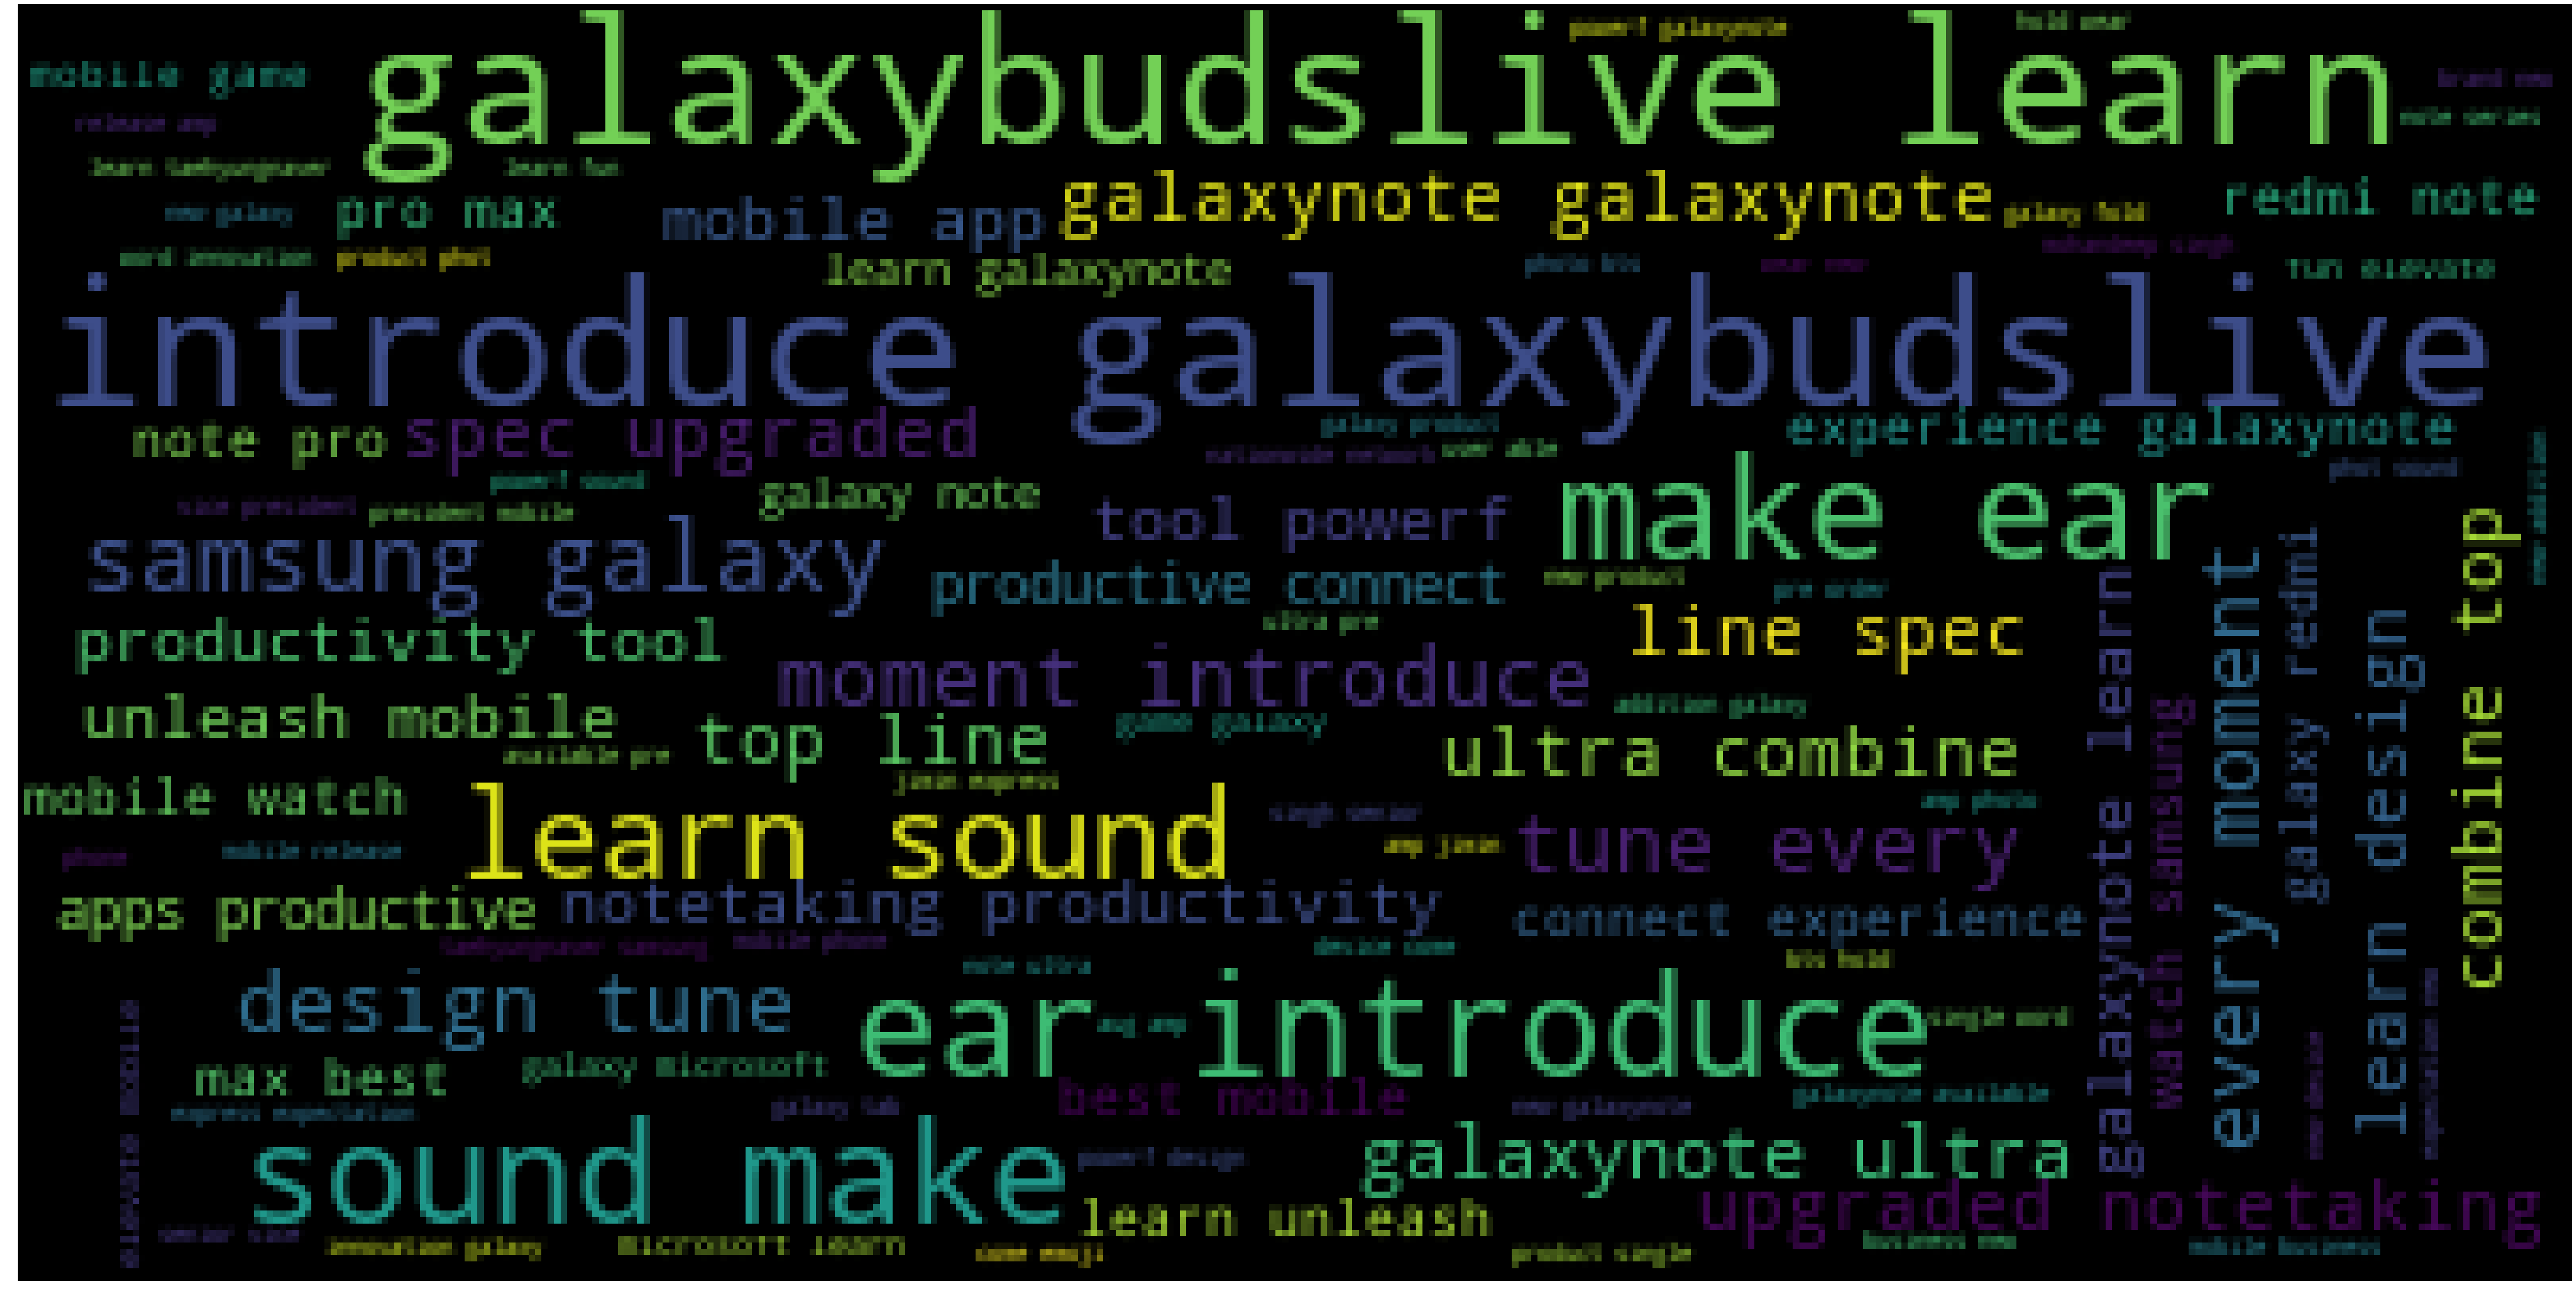

In [ ]:
wc(lemmatized_output,'black','Common Words' )

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [ ]:
df["Polarity"] = df["textclean"].apply(sentiment)

In [ ]:
df

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,...,isRetweet,retweeted,longitude,latitude,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,textclean,Polarity
0,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 09:00,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767
1,Here are M1's mobile plan offerings together w...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://www.echobox.com\"" rel=\""nofol...",...,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,Here are M1's mobile plan offerings together w...,0.0000
2,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767
3,RT @SamsungMobile: Sound made for your ears. I...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Sound made for your ears. Introducing #Gal...,0.0000
4,#BestSeller #phonentablet Tentoper Smart Clear...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobileoutfits.com/\"" rel=\""no...",...,FALSE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,#BestSeller #phonentablet Tentoper Smart Clear...,0.6486
5,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767
6,RT @Tech_Masala_: #Samsung @SamsungMobile @Sam...,FALSE,0,NaN,07-08-2020 08:43,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT #Samsung #GalaxyTabS7 and #GalaxyTabS7Pl...,0.0000
7,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:41,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/iphone\"" ...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767
8,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:40,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobile.twitter.com\"" rel=\""no...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767
9,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:39,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobile.twitter.com\"" rel=\""no...",...,TRUE,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767


In [ ]:
def senti(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [ ]:
df['Sentiment'] = df.apply(senti, axis=1)

In [ ]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,...,retweeted,longitude,latitude,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,textclean,Polarity,Sentiment
0,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 09:00,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive
1,Here are M1's mobile plan offerings together w...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://www.echobox.com\"" rel=\""nofol...",...,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,Here are M1's mobile plan offerings together w...,0.0000,Neutral
2,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive
3,RT @SamsungMobile: Sound made for your ears. I...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,RT Sound made for your ears. Introducing #Gal...,0.0000,Neutral
4,#BestSeller #phonentablet Tentoper Smart Clear...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobileoutfits.com/\"" rel=\""no...",...,FALSE,NaN,NaN,NaN,NaN,NaN,NaN,#BestSeller #phonentablet Tentoper Smart Clear...,0.6486,Positive


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [ ]:
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [ ]:
df["Aspects"] = df["textclean"].apply(pos)

In [ ]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,...,longitude,latitude,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,textclean,Polarity,Sentiment,Aspects
0,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 09:00,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"
1,Here are M1's mobile plan offerings together w...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://www.echobox.com\"" rel=\""nofol...",...,NaN,NaN,NaN,NaN,NaN,NaN,Here are M1's mobile plan offerings together w...,0.0000,Neutral,"[plan, offerings, series]"
2,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"
3,RT @SamsungMobile: Sound made for your ears. I...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Sound made for your ears. Introducing #Gal...,0.0000,Neutral,"[ears, #]"
4,#BestSeller #phonentablet Tentoper Smart Clear...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobileoutfits.com/\"" rel=\""no...",...,NaN,NaN,NaN,NaN,NaN,NaN,#BestSeller #phonentablet Tentoper Smart Clear...,0.6486,Positive,"[#, View]"


In [ ]:
df.head(100)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,...,longitude,latitude,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,textclean,Polarity,Sentiment,Aspects
0,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 09:00,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"
1,Here are M1's mobile plan offerings together w...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://www.echobox.com\"" rel=\""nofol...",...,NaN,NaN,NaN,NaN,NaN,NaN,Here are M1's mobile plan offerings together w...,0.0000,Neutral,"[plan, offerings, series]"
2,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"
3,RT @SamsungMobile: Sound made for your ears. I...,FALSE,0,NaN,07-08-2020 08:59,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Sound made for your ears. Introducing #Gal...,0.0000,Neutral,"[ears, #]"
4,#BestSeller #phonentablet Tentoper Smart Clear...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobileoutfits.com/\"" rel=\""no...",...,NaN,NaN,NaN,NaN,NaN,NaN,#BestSeller #phonentablet Tentoper Smart Clear...,0.6486,Positive,"[#, View]"
5,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:56,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"
6,RT @Tech_Masala_: #Samsung @SamsungMobile @Sam...,FALSE,0,NaN,07-08-2020 08:43,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/android\""...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT #Samsung #GalaxyTabS7 and #GalaxyTabS7Pl...,0.0000,Neutral,"[#, GalaxyTabS7, mobileÿplat]"
7,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:41,FALSE,NaN,1.290000e+18,NaN,"<a href=\http://twitter.com/download/iphone\"" ...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"
8,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:40,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobile.twitter.com\"" rel=\""no...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"
9,RT @TamilTechOffici: Samsung Galaxy M31s vs Re...,FALSE,0,NaN,07-08-2020 08:39,FALSE,NaN,1.290000e+18,NaN,"<a href=\https://mobile.twitter.com\"" rel=\""no...",...,NaN,NaN,NaN,NaN,NaN,NaN,RT Samsung Galaxy M31s vs Redmi Note 9 Pro MA...,0.6767,Positive,"[M31s, mobile, R]"


TypeError: unhashable type: 'list'

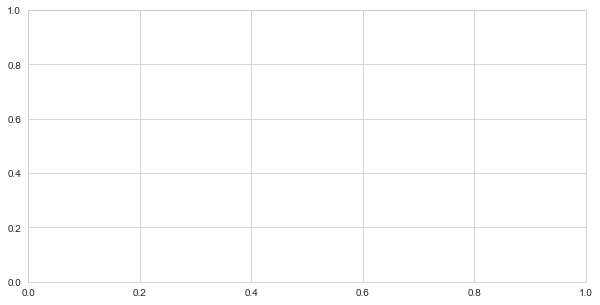

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(df['Aspects'],df['Polarity'],color ='maroon')

plt.xlabel("Aspects ")
plt.ylabel("Polarity")
plt.title("Aspects Bar Plot")
plt.show()